In [1]:
import urllib
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
from numpy.testing import assert_equal
%matplotlib inline



In [3]:
url = "https://dl.dropboxusercontent.com/s/q9geru5vtmz5b55/vk.adjlist?dl=1"
with urllib.request.urlopen(url) as f:
    data = f.read().decode('utf-8')
with open('vk.adjlist', 'w') as f:
    f.write(data) 
    
G = nx.read_adjlist('vk.adjlist')
coord = nx.spring_layout(G, k = 0.15)

In [4]:
k = dict (G.degree ())
k2 = {key: value for key, value in k.items() if value > 0}
G2 = G.subgraph(list(k2.keys()))

In [12]:
# take only giant connected component for the further analysis: 
Gc = max(nx.connected_component_subgraphs(G), key=len)
coord = nx.spring_layout(Gc, k = 0.15)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 2113
Number of edges - 25737


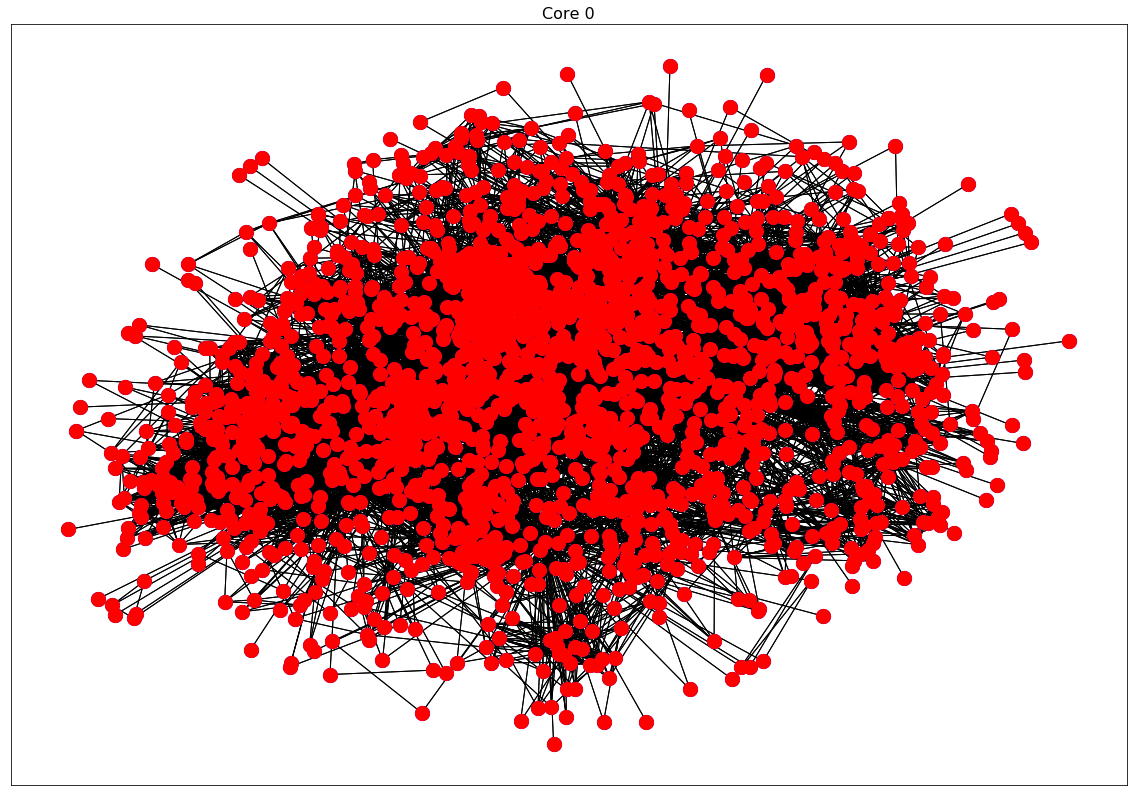

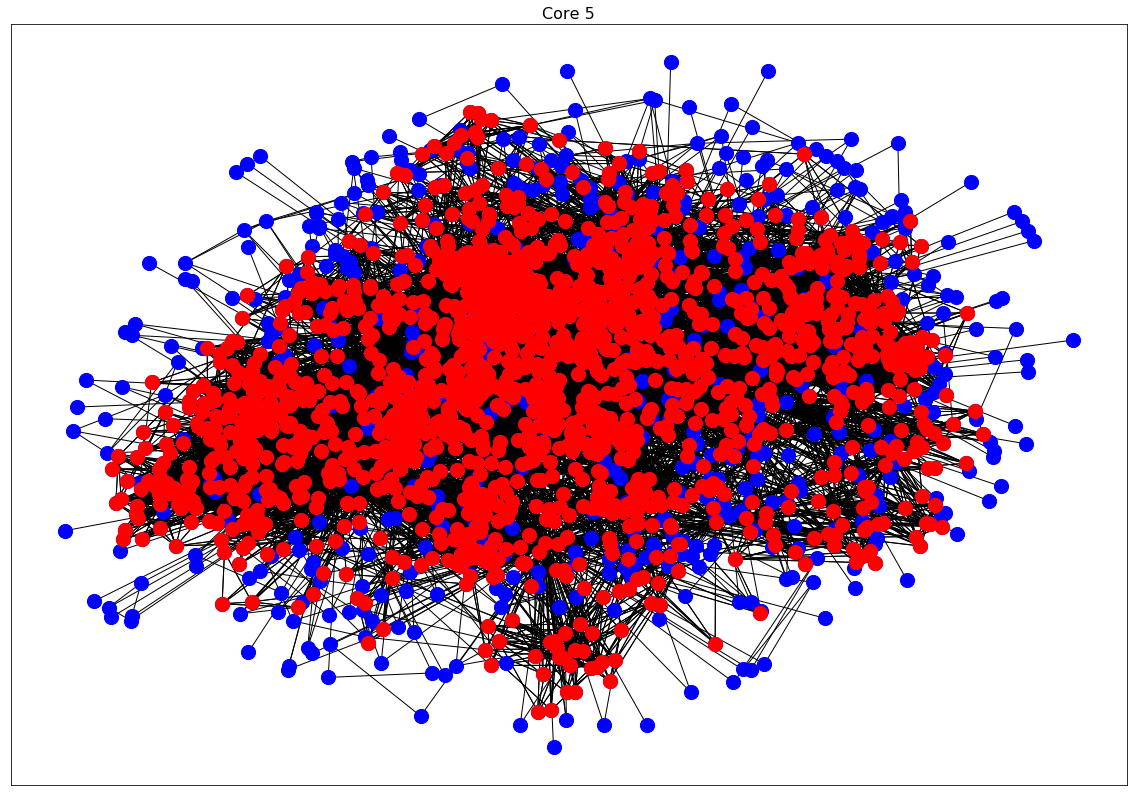

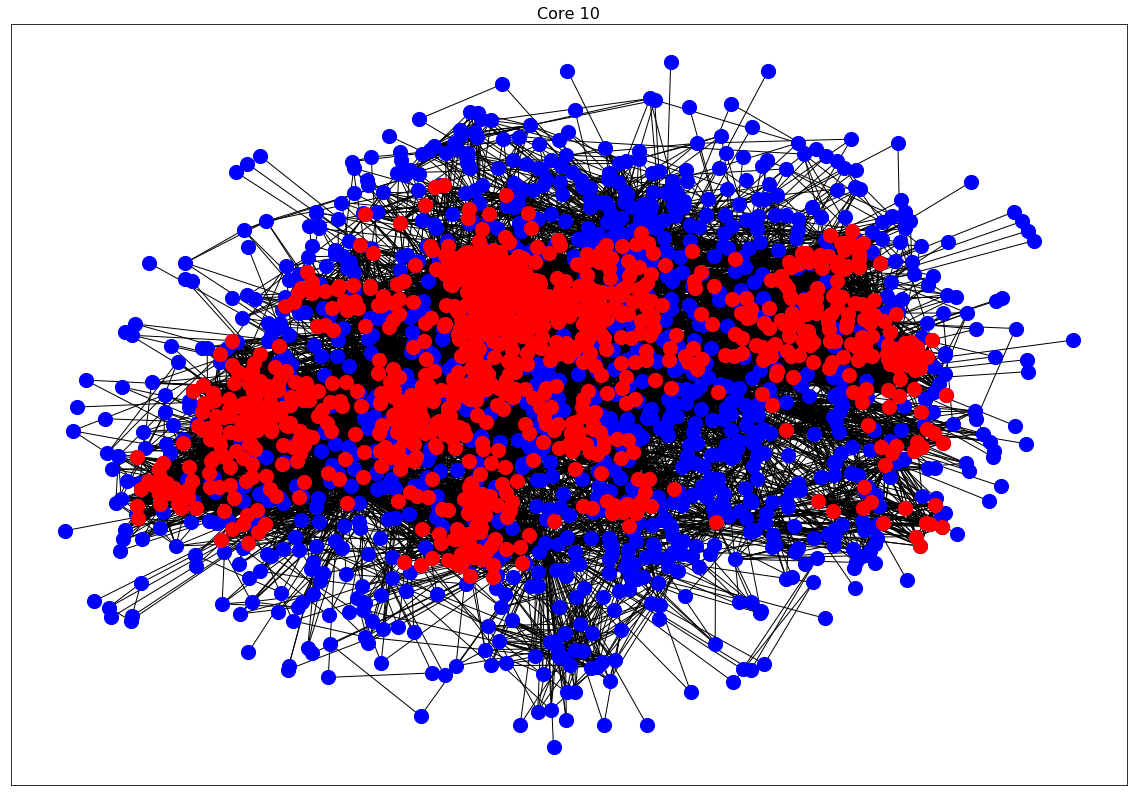

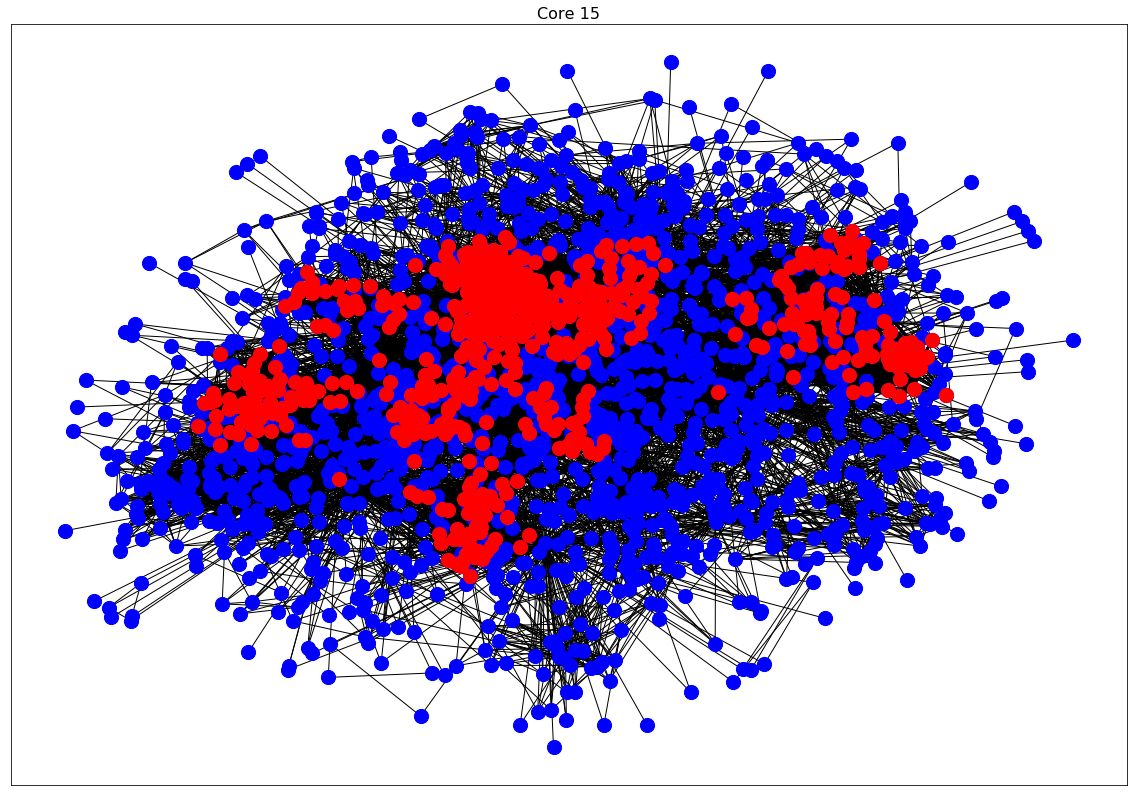

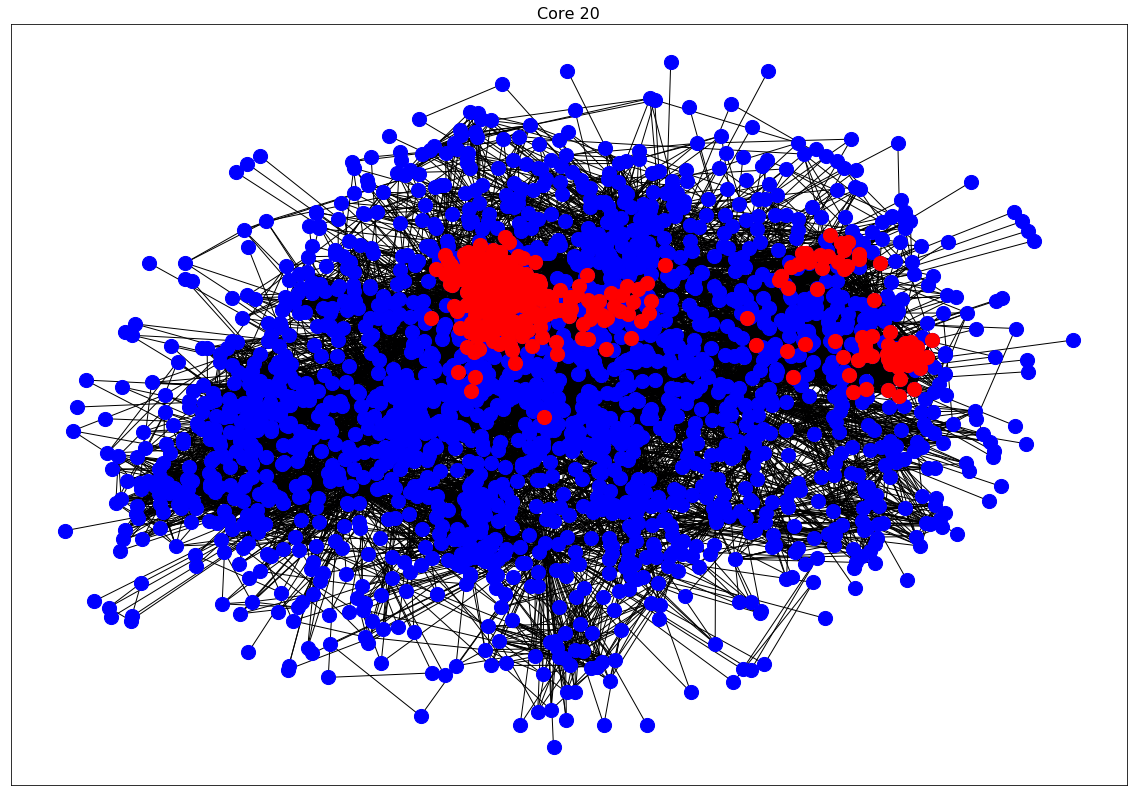

In [15]:
core = 1
for core in range(0, 21, 5):
    plt.figure(figsize=(20,14))

    nx.draw_networkx(Gc, pos=coord, with_labels = False, node_size = 200, node_color = 'b')

    core_subgraph = nx.k_core(Gc, k=core)# G.subgraph(range(6,G.order()))

    nx.draw_networkx(core_subgraph, pos=coord, with_labels = False, node_size = 200, node_color = 'r')
    plt.title('Core {}'.format(core), fontsize = 16)
    # plt.xlim([-.95, 1.05])
    # plt.ylim([-1., .75])

    plt.show()

In [ ]:
core = 1

plt.figure(figsize=(20,14))
nx.draw_networkx(Gc, pos=coord, with_labels = False, node_size = 200, node_color = 'b')

core_subgraph = nx.k_core(Gc, k=1)# G.subgraph(range(6,G.order()))

nx.draw_networkx(core_subgraph, pos=coord, with_labels = False, node_size = 200, node_color = 'r')
plt.title('Core {}'.format(core), fontsize = 16)

plt.show()

NameError: name 'nodes' is not defined

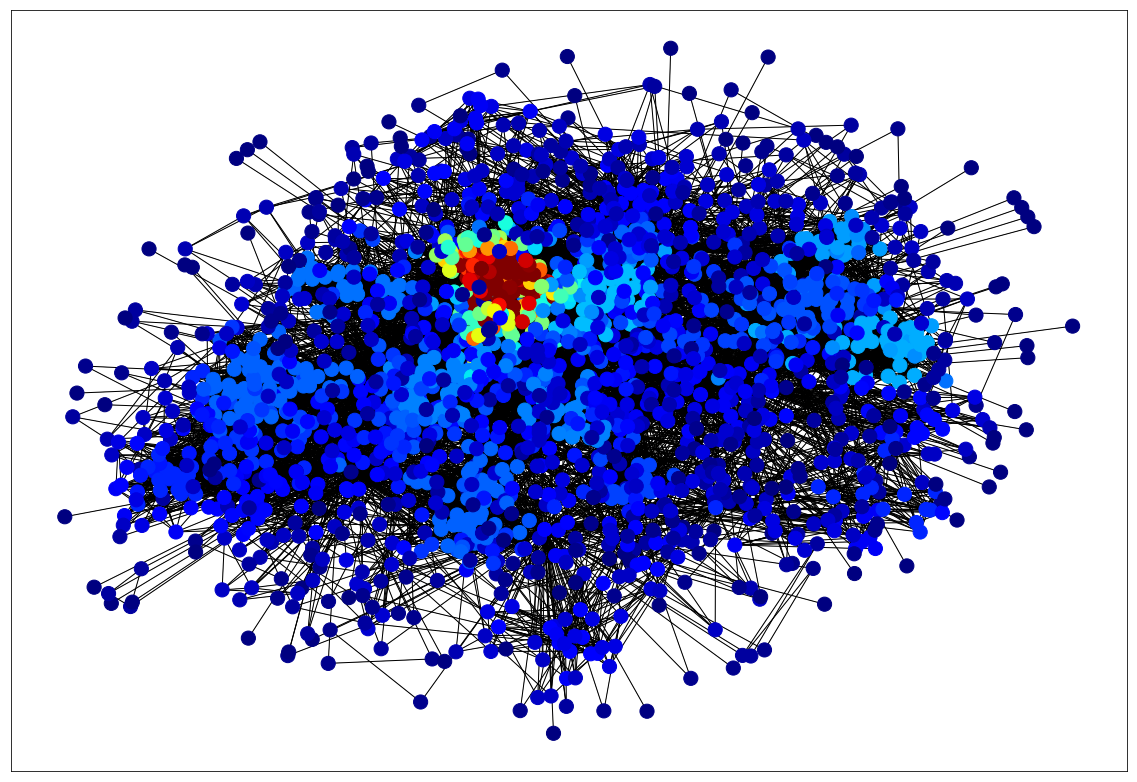

In [14]:
plt.figure(figsize=(20,14))
n_core = nx.core_number(Gc)
nx.draw_networkx(Gc, coord, 
                 with_labels = False,
                 node_list = list(n_core.keys()), 
                 node_color = list(n_core.values()), 
                 node_size = 200,
                 cmap = 'jet',
)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)

plt.colorbar(nodes, shrink=.2, pad=.05, aspect=20)
